In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [4]:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
df.shape

(99999, 226)

##### Changing max rows to display all columns at once

In [6]:
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

In [7]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

## Data Preprocessing

### Handling missing data

##### Dropping date columns, circle_id & mobile_number columns

In [8]:
cols_to_del = ['mobile_number', 'circle_id', 
               'last_date_of_month_6', 'last_date_of_month_7',
               'last_date_of_month_8', 'last_date_of_month_9',
               'date_of_last_rech_6', 'date_of_last_rech_7', 
               'date_of_last_rech_8', 'date_of_last_rech_9', 
               'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 
               'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

In [9]:
print("Before deleting useless variables from df: {}".format(df.shape))
df.drop(cols_to_del, axis=1, inplace=True)
print("After deleting useless variables from df: {}".format(df.shape))

Before deleting useless variables from df: (99999, 226)
After deleting useless variables from df: (99999, 212)


### sweetviz for graphical analysis

- Caution: Below step takes 5 minutes to complete the graphical analysis

In [10]:
# # importing sweetviz
# import sweetviz as sv
# #analyzing the dataset
# advert_report = sv.analyze(df)
# #display the report
# advert_report.show_html('telecom_churn_data.html')

##### Checking the null values percentage in all columns

In [11]:
df.isnull().mean()*100

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

##### Columns having binary result describing whether a user is fb_user & night_pack user

- Data missing in these columns cannot be replaced with zero since 0 means that a user is not a night_pack_user or fb_user
- Hence replacing it with value '-1' instead to create a new set of users who has missing attributes

In [12]:
users_binary_valued_info = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
                            'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9'
                           ]

In [13]:
# Imputing the users_binary_valued_info with 2
df[users_binary_valued_info] = df[users_binary_valued_info].apply(lambda x : x.fillna(-1))

##### There are a few columns where missing data could be filled with zero such as recharge amounts

In [14]:
zero_filling_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                     'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                     'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                     'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                     'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'
                     ]

In [15]:
# Imputing the zero_filling_cols with 0
df[zero_filling_cols] = df[zero_filling_cols].apply(lambda x : x.fillna(0))

In [16]:
df.isnull().mean()*100

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

#### Dropping columns with more than 50% missing values

In [17]:
print("Shape before dropping the high null valued columns: {}".format(df.shape))
high_null_cols = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
                 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']
df.drop(high_null_cols, axis=1, inplace=True)
print("Shape after dropping the high null valued columns: {}".format(df.shape))

Shape before dropping the high null valued columns: (99999, 212)
Shape after dropping the high null valued columns: (99999, 204)


##### Finding the columns with outliers in them

In [18]:
outlier_cols = []
dup_df = pd.DataFrame(df)
for i in dup_df.select_dtypes(exclude='object'):
    IQR = dup_df[i].quantile(0.75) - dup_df[i].quantile(0.25)
    l_bound = dup_df[i].quantile(0.25) - 1.5*IQR
    u_bound = dup_df[i].quantile(0.75) + 1.5*IQR
    dup_df[i] = dup_df[i].fillna(dup_df[i].quantile(0.50))
    if ~dup_df[i].between(l_bound,u_bound).all():
        outlier_cols.append(i)

In [19]:
no_outlier_cols = list(set(list(df.columns)) - set(outlier_cols))
print("Columns containing no outliers are:",len(no_outlier_cols))

Columns containing no outliers are: 19


In [20]:
print("Columns containing outliers are: {}".format(len(outlier_cols)))

Columns containing outliers are: 185


##### Caution: Below sweetviz step takes upto 5 minutes running time ( optional for graphical view of data )

In [21]:
# # importing sweetviz
# import sweetviz as sv
# #analyzing the dataset
# advert_report = sv.analyze(df)
# #display the report
# advert_report.show_html('telecom_churn_data.html')

### Replacing the missing values with mean, median respectively by outliers check

#### Converting the night_pack, fb_users columns to object columns

In [22]:
df[users_binary_valued_info] = df[users_binary_valued_info].astype('object')

In [23]:
df[users_binary_valued_info].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fb_user_6         99999 non-null  object
 1   fb_user_7         99999 non-null  object
 2   fb_user_8         99999 non-null  object
 3   fb_user_9         99999 non-null  object
 4   night_pck_user_6  99999 non-null  object
 5   night_pck_user_7  99999 non-null  object
 6   night_pck_user_8  99999 non-null  object
 7   night_pck_user_9  99999 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


##### Imputing the columns with outliers in below snippet

In [24]:
for i in outlier_cols:
    df[i] = df[i].fillna(df[i].median())

In [25]:
no_outlier_cols = list(set(df.columns) - set(outlier_cols))
print(no_outlier_cols)

['std_og_t2o_mou', 'night_pck_user_7', 'fb_user_8', 'fb_user_9', 'loc_og_t2o_mou', 'loc_ic_t2o_mou', 'night_pck_user_9', 'night_pck_user_6', 'std_og_t2c_mou_6', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_8', 'std_og_t2c_mou_7', 'night_pck_user_8', 'fb_user_7', 'std_ic_t2o_mou_9', 'std_ic_t2o_mou_6', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_7', 'fb_user_6']


##### Imputing the columns with no outliers in below snippet

In [26]:
for i in no_outlier_cols:
    df[i] = df[i].fillna(df[i].mean())

In [27]:
df.isnull().mean()

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

### Derived Variables

In [28]:
df['tot_monthly_recharge_6'] = df['total_rech_amt_6'] + df['total_rech_data_6']
df['tot_monthly_recharge_7'] = df['total_rech_amt_7'] + df['total_rech_data_7']

In [29]:
df['average_recharge_6_7'] = (df['tot_monthly_recharge_6'] + df['tot_monthly_recharge_7'])/2

#### Finding the 70th percentile value to filter the high value customers

In [30]:
percentile_70_value = df['average_recharge_6_7'].quantile(0.70)
print("70th percentile value: {}".format(percentile_70_value))

70th percentile value: 369.5


### Filtering the customers based on 70th percentile value

In [31]:
churn_df = df.loc[df.average_recharge_6_7 >= df.average_recharge_6_7.quantile(0.7), :]

In [32]:
print("Shape before filtering the data: {}".format(df.shape))
print("Shape after filtering the high value customers: {}".format(churn_df.shape))

Shape before filtering the data: (99999, 207)
Shape after filtering the high value customers: (30019, 207)


### Deriving the churn ( 9th month )

##### Points of churning
- Any customer who's calling, data usage = 0 can be marked as CHURN
- Opposite NOT CHURN

##### Calculating the total calling and mobile data usage of month 9

In [33]:
# total calling = incoming + outgoing 
churn_df['tot_calling_month_9'] = churn_df['total_og_mou_9'] + churn_df['total_ic_mou_9']
# data usage = 2g data + 3g data
churn_df['tot_mobile_data_use_9'] = churn_df['vol_2g_mb_9'] + churn_df['vol_3g_mb_9']

##### Create a column named churn based on points of churning

In [34]:
churn_df['churn'] = churn_df.apply(lambda x : 1 if(x['tot_calling_month_9']==0 and x['tot_mobile_data_use_9']==0) else 0, axis=1 )
churn_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7,tot_calling_month_9,tot_mobile_data_use_9,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

##### Bar chart to display the churn rate

Text(0.5, 1.0, 'Churn Rate')

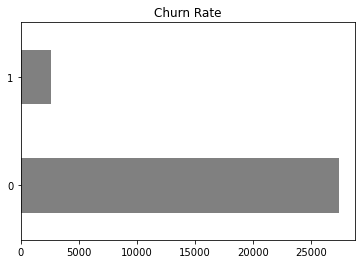

In [35]:
churn_df['churn'].value_counts().plot.barh(color='grey')
plt.title("Churn Rate")
plt.show()

### Deleting all the attributes of month 9

#### Function for finding all 9th month features

In [36]:
month_9_variables = []
def month_9_attributes(df):
    for i in df.columns:
        if i[len(i)-1] == '9':
            month_9_variables.append(i)
month_9_attributes(churn_df)

In [37]:
month_9_variables.append('sep_vbc_3g')

In [38]:
len(month_9_variables)

52

In [39]:
print("Shape of dataframe before dropping month 9 columns: {}".format(churn_df.shape))
churn_df.drop(month_9_variables, axis = 1, inplace = True)
print("Shape of dataframe after dropping month 9 columns: {}".format(churn_df.shape))

Shape of dataframe before dropping month 9 columns: (30019, 210)
Shape of dataframe after dropping month 9 columns: (30019, 158)


### Converting datatype of columns with categorical data into proper dtypes 

#### Identifying categorical columns through sweetviz graphical analysis library

- Caution: Sweetviz below step takes 3-5 minutes to produce the results in a .html page

In [40]:
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('churn_df.html')

In [41]:
# There are a few columns with attributes 0 || 1 binary values, such columns can be converted into object datatype variables
obj_vars = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
           'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
churn_df[obj_vars] = churn_df[obj_vars].apply(lambda x : x.astype("object"), axis=0)

In [42]:
churn_df[obj_vars].dtypes

night_pck_user_6    object
night_pck_user_7    object
night_pck_user_8    object
fb_user_6           object
fb_user_7           object
fb_user_8           object
churn               object
dtype: object

Text(0.5, 1.0, 'night_pck_user_6')

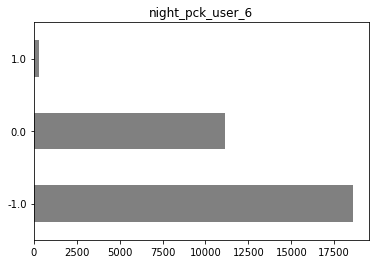

In [43]:
churn_df['night_pck_user_6'].value_counts().plot.barh(color='grey')
plt.title("night_pck_user_6")
plt.show()

- (-1) indicates that information is missing

## EDA

#### Function for univariate & bivariate analysis

In [44]:
def distplot(col):
    sns.distplot(churn_df[col])
    plt.title(col)
def countplot(col):
    sns.countplot(churn_df[col])
    plt.title(col)
def boxplot(col1, col2):
    sns.boxplot(col1, col2)

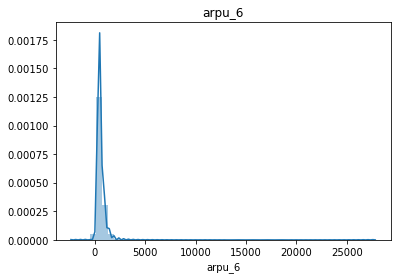

In [45]:
distplot('arpu_6')

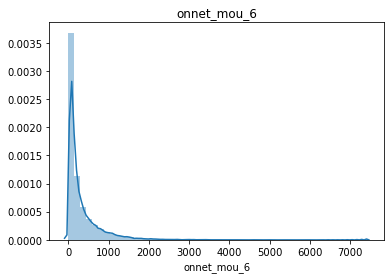

In [46]:
distplot('onnet_mou_6')

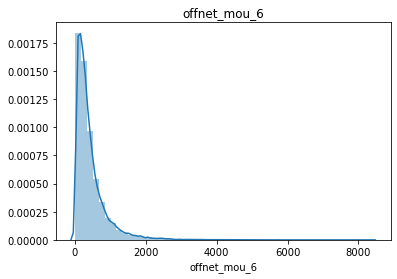

In [47]:
distplot('offnet_mou_6')

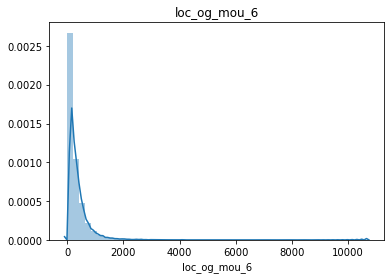

In [48]:
distplot('loc_og_mou_6')

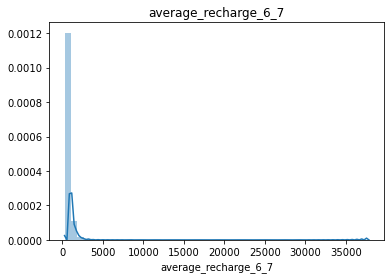

In [49]:
distplot('average_recharge_6_7')

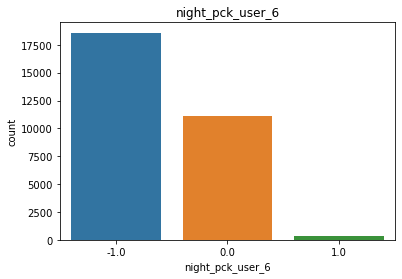

In [50]:
countplot('night_pck_user_6')

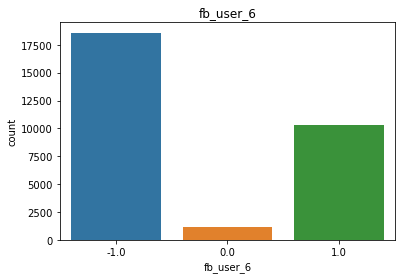

In [51]:
countplot('fb_user_6')

#### Bivariate analysis

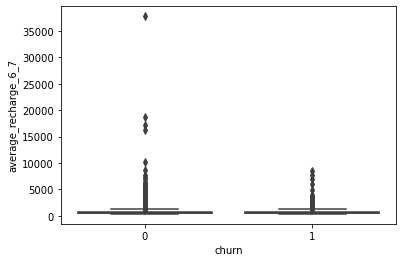

In [52]:
boxplot(churn_df['churn'],churn_df['average_recharge_6_7'])

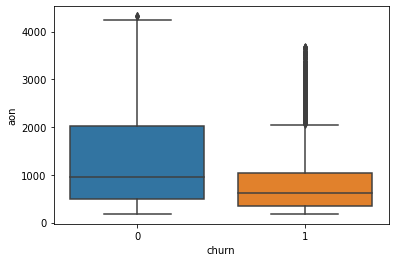

In [53]:
boxplot(churn_df['churn'],churn_df['aon'])

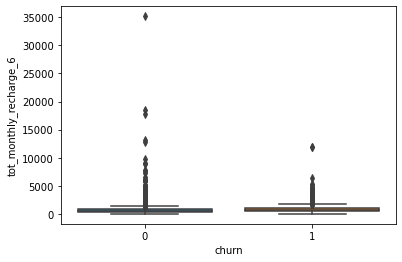

In [54]:
boxplot(churn_df['churn'],churn_df['tot_monthly_recharge_6'])

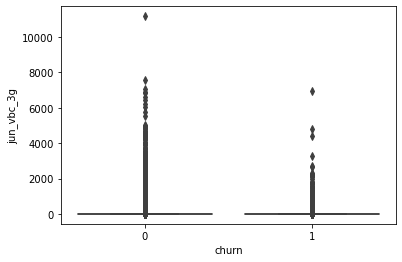

In [55]:
boxplot(churn_df['churn'],churn_df['jun_vbc_3g'])

In [56]:
num_vars = churn_df.select_dtypes(include=['int64','float64'])
num_cols = num_vars.columns

In [57]:
obj_vars = churn_df.select_dtypes(include=['object'])
obj_cols = obj_vars.columns

In [58]:
churn_column = churn_df['churn']
churn_column

7        1
8        0
13       0
16       0
17       0
        ..
99970    0
99974    0
99986    0
99988    0
99997    0
Name: churn, Length: 30019, dtype: object

In [59]:
churn_df.drop('churn', axis = 1, inplace = True)
churn_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,802,57.74,19.38,18.74,1580.0,790.0,1185.0
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1,0,0,0,1,0,0,1,3,0,0,0,0,0,0,-1,1,1,315,21.03,910.65,122.16,437.0,603.0,520.0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.9

### Outlier treatment

Reference: https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html

Formula: Mean - 2 × Standard Deviation

In [1]:
def cap_outliers(array, k=2):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [61]:
# cap outliers in the numeric columns
churn_df[num_cols] = churn_df[num_cols].apply(cap_outliers, axis=0)

In [62]:
churn_df.shape

(30019, 157)

In [63]:
churn_df['churn'] = churn_column
churn_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7,churn
7,0.0,0.0,0.0,1069.180,1349.850,1519.213488,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,52.282847,52.259013,46.920511,0.0,0.0,0.00,422.16,533.91,255.79,4.300000,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,107.229934,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.440000,126.99,141.330000,42.733821,34.24,22.21,0.0,0.0,0.0,180.54000,173.08,193.940000,626.46,558.04,428.740000,0.21,0.0,0.0,2.060000,14.53,31.590000,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1817.074144,520.740264,538.650451,508.035482,0.0,0.0,386.102891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1,-1,-1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1,-1,802.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000000,0.000000,0.000000,0.0,0.0,7.15,378.09,288.18,63.04,116.560000,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.000000,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.430000,4.08,0.650000,0.000000,0.00,0.00,0.0,0.0,0.0,22.43000,4.66,0.750000,103.86,28.49,16.540000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.000000,50.0,0.0,10.000000,0.0,2.0,3.0,0.0,154.0,23.0,0.0

#### Saving the High performance models data

# Creating another csv file from our dataframe

In [64]:
# churn_df.to_csv("high_perfor_models_data.csv")

In [65]:
churn_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7,churn
7,0.0,0.0,0.0,1069.180,1349.850,1519.213488,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,52.282847,52.259013,46.920511,0.0,0.0,0.00,422.16,533.91,255.79,4.300000,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,107.229934,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.440000,126.99,141.330000,42.733821,34.24,22.21,0.0,0.0,0.0,180.54000,173.08,193.940000,626.46,558.04,428.740000,0.21,0.0,0.0,2.060000,14.53,31.590000,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1817.074144,520.740264,538.650451,508.035482,0.0,0.0,386.102891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1,-1,-1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1,-1,802.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000000,0.000000,0.000000,0.0,0.0,7.15,378.09,288.18,63.04,116.560000,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.000000,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.430000,4.08,0.650000,0.000000,0.00,0.00,0.0,0.0,0.0,22.43000,4.66,0.750000,103.86,28.49,16.540000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.000000,50.0,0.0,10.000000,0.0,2.0,3.0,0.0,154.0,23.0,0.0

In [66]:
churn_df.shape

(30019, 158)

##### Copying churn_df into high_perf_df dataframe to prepare High Performance Models

In [67]:
high_perf_df = churn_df.copy()

In [68]:
high_perf_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7,churn
7,0.0,0.0,0.0,1069.180,1349.850,1519.213488,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,52.282847,52.259013,46.920511,0.0,0.0,0.00,422.16,533.91,255.79,4.300000,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,107.229934,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.440000,126.99,141.330000,42.733821,34.24,22.21,0.0,0.0,0.0,180.54000,173.08,193.940000,626.46,558.04,428.740000,0.21,0.0,0.0,2.060000,14.53,31.590000,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1817.074144,520.740264,538.650451,508.035482,0.0,0.0,386.102891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1,-1,-1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1,-1,802.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000000,0.000000,0.000000,0.0,0.0,7.15,378.09,288.18,63.04,116.560000,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.000000,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.430000,4.08,0.650000,0.000000,0.00,0.00,0.0,0.0,0.0,22.43000,4.66,0.750000,103.86,28.49,16.540000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.000000,50.0,0.0,10.000000,0.0,2.0,3.0,0.0,154.0,23.0,0.0

In [69]:
high_perf_df.shape

(30019, 158)

##### Storing the target varible in the target_var

In [70]:
target_var = high_perf_df['churn']

In [71]:
high_perf_df.drop('churn', axis = 1, inplace = True)
high_perf_df.shape

(30019, 157)

In [72]:
from sklearn.preprocessing import StandardScaler

#### Scaling before performing the PCA

In [73]:
num_cols = high_perf_df.select_dtypes(include = ['int64', 'float64']).columns

scaler = StandardScaler()
high_perf_df[num_cols] = scaler.fit_transform(high_perf_df[num_cols])
high_perf_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7
7,0.0,0.0,0.0,1.636538,2.510202,2.917916,-0.632765,-0.638199,-0.582044,0.183719,0.483571,-0.069579,0.119836,0.820679,0.779999,0.055230,-0.047434,0.514612,-0.227406,-0.395114,-0.286462,0.790690,1.591565,0.045609,4.052607,4.018113,3.953139,-0.369572,-0.367066,-0.372651,0.594926,1.012623,0.054113,-0.556035,-0.496123,-0.485373,-0.445253,-0.513778,-0.390214,1.180417,4.049451,3.777932,0.0,0.0,0.0,-0.635238,-0.616203,-0.524932,-0.138064,-0.117964,1.157448,-0.040652,-0.545198,0.071548,-0.426134,-0.052411,-0.053892,-0.310926,-0.114909,-0.443956,-0.016040,-0.342466,-0.375726,0.465410,0.489991,-0.142311,3.941360,3.456858,1.220376,0.901843,0.565176,-0.138790,0.842253,-0.042611,0.690776,1.392479,2.061516,2.514639,6.146451,4.709044,3.162115,0.0,0.0,0.0,1.983680,1.779694,2.276002,1.288744,1.000177,0.589241,1.170169,-0.211988,-0.281408,-0.204331,0.235887,0.929155,4.530180,3.662803,4.386994,-0.891236,-0.840879,-0.362534,2.462928,0.306563,2.922249,3.140534,3.170830,3.094419,-1.066931,-1.041198,3.180123,-0.590113,-0.584966,-0.586743,-0.6139,-0.621789,-0.600220,-0.488382,-0.488388,-0.500218,-0.416789,-0.412447,-0.398331,-0.598368,-0.610213,-0.599025,-0.392531,-0.387670,-0.370156,-0.423909,-0.440588,-0.432326,-1,-1,-1,-0.353408,-0.360820,-0.338008,-0.390873,-0.398025,-0.421096,-0.36456,-0.365912,-0.358684,-0.25275,-0.24774,-0.231834,-1,-1,-1,-0.474119,-0.182020,-0.345100,-0.325309,2.459186,0.303607,1.619414
8,0.0,0.0,0.0,-0.621115,-0.254252,-1.102039,0.447605,0.226780,-0.636276,-0.848816,-0.882442,-0.628892,-0.334017,-0.294580,-0.297937,-0.354586,-0.327419,-0.317323,1.819886,1.134152,-0.529421,-0.476394,-0.549151,-0.608889,-0.489121,-0.495552,-0.489869,-0.369572

In [74]:
high_perf_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7
7,0.0,0.0,0.0,1.636538,2.510202,2.917916,-0.632765,-0.638199,-0.582044,0.183719,0.483571,-0.069579,0.119836,0.820679,0.779999,0.055230,-0.047434,0.514612,-0.227406,-0.395114,-0.286462,0.790690,1.591565,0.045609,4.052607,4.018113,3.953139,-0.369572,-0.367066,-0.372651,0.594926,1.012623,0.054113,-0.556035,-0.496123,-0.485373,-0.445253,-0.513778,-0.390214,1.180417,4.049451,3.777932,0.0,0.0,0.0,-0.635238,-0.616203,-0.524932,-0.138064,-0.117964,1.157448,-0.040652,-0.545198,0.071548,-0.426134,-0.052411,-0.053892,-0.310926,-0.114909,-0.443956,-0.016040,-0.342466,-0.375726,0.465410,0.489991,-0.142311,3.941360,3.456858,1.220376,0.901843,0.565176,-0.138790,0.842253,-0.042611,0.690776,1.392479,2.061516,2.514639,6.146451,4.709044,3.162115,0.0,0.0,0.0,1.983680,1.779694,2.276002,1.288744,1.000177,0.589241,1.170169,-0.211988,-0.281408,-0.204331,0.235887,0.929155,4.530180,3.662803,4.386994,-0.891236,-0.840879,-0.362534,2.462928,0.306563,2.922249,3.140534,3.170830,3.094419,-1.066931,-1.041198,3.180123,-0.590113,-0.584966,-0.586743,-0.6139,-0.621789,-0.600220,-0.488382,-0.488388,-0.500218,-0.416789,-0.412447,-0.398331,-0.598368,-0.610213,-0.599025,-0.392531,-0.387670,-0.370156,-0.423909,-0.440588,-0.432326,-1,-1,-1,-0.353408,-0.360820,-0.338008,-0.390873,-0.398025,-0.421096,-0.36456,-0.365912,-0.358684,-0.25275,-0.24774,-0.231834,-1,-1,-1,-0.474119,-0.182020,-0.345100,-0.325309,2.459186,0.303607,1.619414
8,0.0,0.0,0.0,-0.621115,-0.254252,-1.102039,0.447605,0.226780,-0.636276,-0.848816,-0.882442,-0.628892,-0.334017,-0.294580,-0.297937,-0.354586,-0.327419,-0.317323,1.819886,1.134152,-0.529421,-0.476394,-0.549151,-0.608889,-0.489121,-0.495552,-0.489869,-0.369572

In [75]:
high_perf_df.shape

(30019, 157)

In [76]:
X_train = high_perf_df

In [77]:
y = target_var
y=y.astype('int')

In [78]:
y.value_counts()[1]

2590

## Class Imbalance handling using SMOTE 

In [79]:
from imblearn.over_sampling import SMOTE

print("Dimenstions of churn data before SMOTE")
print("Before OverSampling, counts of label '1': {}".format(y.value_counts()[1]))
print("Before OverSampling, counts of label '0': {}".format(y.value_counts()[0]))
sm = SMOTE(random_state=2)
X_train_res, y_res = sm.fit_sample(X_train, y.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Dimenstions of churn data before SMOTE
Before OverSampling, counts of label '1': 2590
Before OverSampling, counts of label '0': 27429
After OverSampling, counts of label '1': 27429
After OverSampling, counts of label '0': 27429


#### y is stored in y_res & X in X_train_res

In [80]:
high_perf_df = X_train_res

### PCA

In [81]:
from sklearn.decomposition import PCA

##### PCA for variables explaining 90% variance

In [82]:
pca = PCA(0.90)
pca_data = pca.fit_transform(high_perf_df)
pca_data.shape

(54858, 50)

In [83]:
# Calculating the cumulative scores of all features
var_cumu = np.cumsum(pca.explained_variance_ratio_)

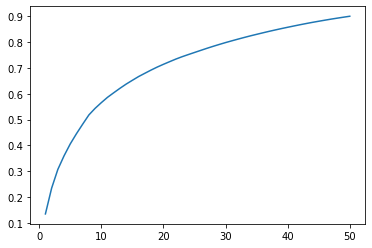

In [84]:
plt.plot(range(1, len(var_cumu)+1), var_cumu)

#### PCA for variables explaining 95% variance

In [85]:
pca1 = PCA(0.95)
pca_data1 = pca1.fit_transform(high_perf_df)
pca_data1.shape

(54858, 69)

In [86]:
y_res.shape

(54858,)

#### Converting the 90% explaining variables into a dataframe named df_pca

In [87]:
df_pca = pd.DataFrame(pca_data)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,7.235834,5.941389,-4.586670,5.749482,-0.650765,3.918350,3.536523,3.434187,2.729810,-3.063248,-2.076341,7.449585,-2.590240,1.926027,-1.535470,1.239365,2.121644,-3.022788,-1.354219,-0.788792,-0.522842,-1.708965,-4.316561,2.273492,0.765057,-0.901964,-0.916434,1.236250,0.571933,2.221617,-4.001101,-0.533939,-0.976758,0.247903,0.726856,-0.157214,0.070708,0.951629,0.246385,1.210157,2.557378,-0.498728,1.914404,0.054950,-0.870295,-1.615649,-1.568130,-1.895311,-0.560881,2.382604
1,0.222509,-2.836959,1.252479,-2.928243,-1.131243,-0.262849,-1.404296,-0.403083,0.290517,0.021827,-1.011727,-1.187170,0.793860,1.470045,2.527197,-0.962313,0.721801,-1.895459,0.899704,-0.531018,-0.070196,-0.843258,1.237950,2.413512,-1.890607,-1.267073,-0.107071,-1.164439,0.732937,-0.796651,-0.529923,-0.449307,0.387808,0.021915,0.281326,1.036326,1.199171,0.383904,0.826167,0.559832,-0.550842,0.353388,0.723272,-0.444942,0.197923,-0.097232,-0.787127,-0.155487,1.200053,0.241489
2,1.695710,3.168866,-1.510845,1.266094,-2.535328,7.421743,3.323892,7.618041,2.020172,-2.101630,4.654639,-2.326888,0.906814,5.037931,-1.194943,6.984246,-5.902675,-3.426645,0.035254,0.592498,-0.795519,-1.994999,-1.691724,1.985407,0.570033,0.801293,0.101275,-3.580408,1.935315,-0.514010,-2.941172,-0.497108,-2.194609,-0.264424,1.212510,-1.670364,-1.388139,-0.210283,-0.544212,-0.110655,-0.795007,-1.093949,-2.064360,-0.692999,0.367376,-1.791313,-0.329033,-1.306080,-1.289368,-1.739234
3,-0.495141,-0.480697,-3.569880,0.309902,-0.910941,1.007190,1.696691,1.910003,-0.666385,0.489002,0.403787,-0.607606,-0.646707,-0.499078,0.396810,-1.645588,-1.052736,0.275943,-0.093016,0.438844,0.253278,-0.582793,0.085800,-0.286631,-0.173505,0.407590,0.854930,0.304228,-0.118579,0.317106,-0.204456,0.117759,0.201743,-0.333673,0.550709,-0.196973,0.281549,0.184967,0.107833,0.129096,0.087042,0.164955,0.847528,-0.471736,-0.069430,-0.306729,-0.361663,-0.106102,-0.232174,-0.313972
4,-5.092691,-2.353444,-0.815972,-0.511454,2.298304,-1.331770,-1.061164,2.069419,-0.440909,-1.289187,0.826853,-0.010044,-0.113541,1.480021,0.070462,-0.265665,0.342690,-0.405146,-0.249353,0.641923,-0.633334,-0.069969,0.487952,-0.347774,0.255922,0.055617,-0.327281,0.629636,0.304089,-1.035088,-0.559969,0.294644,0.211272,0.294579,-0.317074,-0.176770,1.477672,1.272035,-0.727043,0.385065,-0.113041,-0.285360,0.206910,-0.342724,-0.241364,-0.050234,0.087912,0.128121,0.153910,0.454224


## Random Forest Model ( high performace model 1 )

#### Creating a copy of dataframe for the random forest model named as df_rf

In [88]:
df_rf = df_pca.copy()

In [89]:
print(df_rf.shape)

(54858, 50)


##### Train Test Split

In [90]:
X_rf = df_rf
y_rf = y_res
# y_rf = np.asarray(y_rf, dtype="|S6")
print(X_rf.shape)
print(y_rf.shape)

(54858, 50)
(54858,)


In [91]:
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, train_size=0.7, random_state=100)
print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)

(38400, 50)
(38400,)
(16458, 50)
(16458,)


In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier(random_state = 100, n_jobs = -1)

In [94]:
# Creating a parameters grid for GridSearchCV
params = {
    'max_depth': [2, 4, 8, 10, 12],
    'min_samples_leaf': range(100, 400, 200),
    'max_features': [2, 3, 6],
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100, 150, 200, 30]
}

In [95]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [96]:
%%time
grid_search.fit(X_train_rf,y_train_rf)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


Wall time: 1min 51s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 8, 10, 12],
                                        'max_features': [2, 3, 6],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 100),
                                        'n_estimators': [100, 150, 200, 30]},
                   scoring='recall', verbose=1)

In [97]:
rf_best = grid_search.best_estimator_

In [98]:
rf_best

RandomForestClassifier(max_depth=8, max_features=3, min_samples_leaf=100,
                       min_samples_split=300, n_estimators=30, n_jobs=-1,
                       random_state=100)

#### Results for the high performance model 1 ( Random Forest )

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Train Accuracy :", accuracy_score(y_train_rf, rf_best.predict(X_train_rf)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train_rf, rf_best.predict(X_train_rf)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test_rf, rf_best.predict(X_test_rf)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test_rf, rf_best.predict(X_test_rf)))

Train Accuracy : 0.8475520833333333
Train Confusion Matrix:
[[16534  2632]
 [ 3222 16012]]
--------------------------------------------------
Test Accuracy : 0.8400777737270628
Test Confusion Matrix:
[[7089 1174]
 [1458 6737]]


# Results for Random Forest

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test_rf, rf_best.predict(X_test_rf)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      8263
           1       0.85      0.82      0.84      8195

    accuracy                           0.84     16458
   macro avg       0.84      0.84      0.84     16458
weighted avg       0.84      0.84      0.84     16458



- We attained a recall of 84% i.e we are able to predict 84 out of 100 persons who are going to predict

In [101]:
recall_rf = 0.80
accuracy_rf = 0.81

## Decision Treee Model ( high performance model 2)

#### Creating a copy of dataframe for the random forest named as df_dt

In [102]:
df_dt = df_pca.copy()

In [103]:
print(df_dt.shape)

(54858, 50)


#### Train Test Split

In [104]:
X_dt = df_dt
y_dt = y_res
# y_dt = np.asarray(y_dt, dtype="|S6")
print(X_dt.shape)
print(y_dt.shape)

(54858, 50)
(54858,)


In [105]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, train_size = 0.7, random_state = 100)
print(X_train_dt.shape)
print(y_train_dt.shape)
print(X_test_dt.shape)
print(y_test_dt.shape)

(38400, 50)
(38400,)
(16458, 50)
(16458,)


In [106]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 100)

In [107]:
# Creating a parameters grid for GridSearchCV
params = {
    'max_depth': [2, 4, 8, 10, 12],
    'min_samples_leaf': range(100, 400, 200),
    'max_features': [2, 3, 6],
    'min_samples_split': range(200, 500, 100),
    'criterion': ["gini", "entropy"]
}

In [108]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator=dt, param_distributions=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "recall")

In [109]:
%%time
grid_search.fit(X_train_dt, y_train_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.6s finished


Wall time: 5.44 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 8, 10, 12],
                                        'max_features': [2, 3, 6],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 100)},
                   scoring='recall', verbose=1)

In [110]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=6, min_samples_leaf=100,
                       min_samples_split=200, random_state=100)

In [111]:
dt_best = grid_search.best_estimator_

In [112]:
print(classification_report(y_test_dt, dt_best.predict(X_test_dt)))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      8263
           1       0.77      0.81      0.79      8195

    accuracy                           0.78     16458
   macro avg       0.78      0.78      0.78     16458
weighted avg       0.78      0.78      0.78     16458



- We attained a good recall of 88% i.e We are able to predict 86 persons out of 100 who are actually going to predict
- The accuracy score seems a little low, but the business solution needs a recall to fulfil our problem

## Logistic Regression Model ( high performance model 3 )

In [113]:
recall_dt = 0.87
accuracy_dt = 0.83

In [114]:
df_log = df_pca.copy()

In [115]:
df_log.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,7.235834,5.941389,-4.586670,5.749482,-0.650765,3.918350,3.536523,3.434187,2.729810,-3.063248,-2.076341,7.449585,-2.590240,1.926027,-1.535470,1.239365,2.121644,-3.022788,-1.354219,-0.788792,-0.522842,-1.708965,-4.316561,2.273492,0.765057,-0.901964,-0.916434,1.236250,0.571933,2.221617,-4.001101,-0.533939,-0.976758,0.247903,0.726856,-0.157214,0.070708,0.951629,0.246385,1.210157,2.557378,-0.498728,1.914404,0.054950,-0.870295,-1.615649,-1.568130,-1.895311,-0.560881,2.382604
1,0.222509,-2.836959,1.252479,-2.928243,-1.131243,-0.262849,-1.404296,-0.403083,0.290517,0.021827,-1.011727,-1.187170,0.793860,1.470045,2.527197,-0.962313,0.721801,-1.895459,0.899704,-0.531018,-0.070196,-0.843258,1.237950,2.413512,-1.890607,-1.267073,-0.107071,-1.164439,0.732937,-0.796651,-0.529923,-0.449307,0.387808,0.021915,0.281326,1.036326,1.199171,0.383904,0.826167,0.559832,-0.550842,0.353388,0.723272,-0.444942,0.197923,-0.097232,-0.787127,-0.155487,1.200053,0.241489
2,1.695710,3.168866,-1.510845,1.266094,-2.535328,7.421743,3.323892,7.618041,2.020172,-2.101630,4.654639,-2.326888,0.906814,5.037931,-1.194943,6.984246,-5.902675,-3.426645,0.035254,0.592498,-0.795519,-1.994999,-1.691724,1.985407,0.570033,0.801293,0.101275,-3.580408,1.935315,-0.514010,-2.941172,-0.497108,-2.194609,-0.264424,1.212510,-1.670364,-1.388139,-0.210283,-0.544212,-0.110655,-0.795007,-1.093949,-2.064360,-0.692999,0.367376,-1.791313,-0.329033,-1.306080,-1.289368,-1.739234
3,-0.495141,-0.480697,-3.569880,0.309902,-0.910941,1.007190,1.696691,1.910003,-0.666385,0.489002,0.403787,-0.607606,-0.646707,-0.499078,0.396810,-1.645588,-1.052736,0.275943,-0.093016,0.438844,0.253278,-0.582793,0.085800,-0.286631,-0.173505,0.407590,0.854930,0.304228,-0.118579,0.317106,-0.204456,0.117759,0.201743,-0.333673,0.550709,-0.196973,0.281549,0.184967,0.107833,0.129096,0.087042,0.164955,0.847528,-0.471736,-0.069430,-0.306729,-0.361663,-0.106102,-0.232174,-0.313972
4,-5.092691,-2.353444,-0.815972,-0.511454,2.298304,-1.331770,-1.061164,2.069419,-0.440909,-1.289187,0.826853,-0.010044,-0.113541,1.480021,0.070462,-0.265665,0.342690,-0.405146,-0.249353,0.641923,-0.633334,-0.069969,0.487952,-0.347774,0.255922,0.055617,-0.327281,0.629636,0.304089,-1.035088,-0.559969,0.294644,0.211272,0.294579,-0.317074,-0.176770,1.477672,1.272035,-0.727043,0.385065,-0.113041,-0.285360,0.206910,-0.342724,-0.241364,-0.050234,0.087912,0.128121,0.153910,0.454224


### Train Test Split

In [116]:
df_log['churn'] = y_res
df_log.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,churn
0,7.235834,5.941389,-4.586670,5.749482,-0.650765,3.918350,3.536523,3.434187,2.729810,-3.063248,-2.076341,7.449585,-2.590240,1.926027,-1.535470,1.239365,2.121644,-3.022788,-1.354219,-0.788792,-0.522842,-1.708965,-4.316561,2.273492,0.765057,-0.901964,-0.916434,1.236250,0.571933,2.221617,-4.001101,-0.533939,-0.976758,0.247903,0.726856,-0.157214,0.070708,0.951629,0.246385,1.210157,2.557378,-0.498728,1.914404,0.054950,-0.870295,-1.615649,-1.568130,-1.895311,-0.560881,2.382604,1
1,0.222509,-2.836959,1.252479,-2.928243,-1.131243,-0.262849,-1.404296,-0.403083,0.290517,0.021827,-1.011727,-1.187170,0.793860,1.470045,2.527197,-0.962313,0.721801,-1.895459,0.899704,-0.531018,-0.070196,-0.843258,1.237950,2.413512,-1.890607,-1.267073,-0.107071,-1.164439,0.732937,-0.796651,-0.529923,-0.449307,0.387808,0.021915,0.281326,1.036326,1.199171,0.383904,0.826167,0.559832,-0.550842,0.353388,0.723272,-0.444942,0.197923,-0.097232,-0.787127,-0.155487,1.200053,0.241489,0
2,1.695710,3.168866,-1.510845,1.266094,-2.535328,7.421743,3.323892,7.618041,2.020172,-2.101630,4.654639,-2.326888,0.906814,5.037931,-1.194943,6.984246,-5.902675,-3.426645,0.035254,0.592498,-0.795519,-1.994999,-1.691724,1.985407,0.570033,0.801293,0.101275,-3.580408,1.935315,-0.514010,-2.941172,-0.497108,-2.194609,-0.264424,1.212510,-1.670364,-1.388139,-0.210283,-0.544212,-0.110655,-0.795007,-1.093949,-2.064360,-0.692999,0.367376,-1.791313,-0.329033,-1.306080,-1.289368,-1.739234,0
3,-0.495141,-0.480697,-3.569880,0.309902,-0.910941,1.007190,1.696691,1.910003,-0.666385,0.489002,0.403787,-0.607606,-0.646707,-0.499078,0.396810,-1.645588,-1.052736,0.275943,-0.093016,0.438844,0.253278,-0.582793,0.085800,-0.286631,-0.173505,0.407590,0.854930,0.304228,-0.118579,0.317106,-0.204456,0.117759,0.201743,-0.333673,0.550709,-0.196973,0.281549,0.184967,0.107833,0.129096,0.087042,0.164955,0.847528,-0.471736,-0.069430,-0.306729,-0.361663,-0.106102,-0.232174,-0.313972,0
4,-5.092691,-2.353444,-0.815972,-0.511454,2.298304,-1.331770,-1.061164,2.069419,-0.440909,-1.289187,0.826853,-0.010044,-0.113541,1.480021,0.070462,-0.265665,0.342690,-0.405146,-0.249353,0.641923,-0.633334,-0.069969,0.487952,-0.347774,0.255922,0.055617,-0.327281,0.629636,0.304089,-1.035088,-0.559969,0.294644,0.211272,0.294579,-0.317074,-0.176770,1.477672,1.272035,-0.727043,0.385065,-0.113041,-0.285360,0.206910,-0.342724,-0.241364,-0.050234,0.087912,0.128121,0.153910,0.454224,0


In [117]:
X_log = df_log.drop('churn', axis = 1)
y_log = df_log['churn']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, train_size=0.7, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38400, 50)
(38400,)
(16458, 50)
(16458,)


In [119]:
# Checking he type of variable of y_train
print(type(y_train))

<class 'pandas.core.series.Series'>


In [120]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [121]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38349
Model Family:                Binomial   Df Model:                           50
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14607.
Date:                Tue, 01 Sep 2020   Deviance:                       29215.
Time:                        14:25:41   Pearson chi2:                 7.43e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2403      0.017    -14.384      0.000      -0.273      -0.208
0             -0.4256      0.005    -80.717      0.000      -0.436      -0.415
1             -0.1643      0.005    -34.907      0.000      -0.174      -0.155
2              0.1122      0.006     20.282      0.000       0.101       0.123
3              0.1710      0.006     28.261      0.000       0.159       0.183
4              0.4467      0.007     62.202      0.000       0.433       0.461
5              0.0514      0.007      7.433      0.000       0.038       0.065
6             -0.0180      0.007     -2.479      0.013      -0.032      -0.004
7              0.0020      0.007      0.273      0.785      -0.012       0.016
8              0.1313      0.009     14.602      0.000       0.114       0.149
9              0.5631      0.011     52.823      0.000       0.542       0.584
10            -0.4022      0.011    -36.638      0.000      -0.424      -0.381
11            -0.1269      0.012    -10.802      0.000      -0.150      -0.104
12            -0.1188      0.012    -10.264      0.000      -0.141      -0.096
13            -0.1510      0.012    -13.005      0.000      -0.174      -0.128
14            -0.0199      0.012     -1.600      0.110      -0.044       0.004
15             0.0304      0.012      2.474      0.013       0.006       0.054
16             0.0033      0.014      0.238      0.812      -0.024       0.030
17             0.0569      0.013      4.225      0.000       0.031       0.083
18             0.0116      0.013      0.877      0.380      -0.014       0.038
19            -0.1711      0.014    -12.221      0.000      -0.199      -0.144
20             0.0423      0.014      2.950      0.003       0.014       0.070
21             0.1159      0.016      7.100      0.000       0.084       0.148
22             0.1013      0.015      6.565      0.000       0.071       0.132
23             0.1166      0.016      7.206      0.000       0.085       0.148
24            -0.2307      0.016    -14.223      0.000      -0.262      -0.199
25             0.0144      0.017      0.857      0.391      -0.019       0.047
26            -0.0368      0.016     -2.285      0.022      -0.068      -0.005
27            -0.0221      0.016     -1.345      0.178      -0.054       0.010
28            -0.0466      0.020     -2.356      0.018      -0.085      -0.008
29             0.1177      0.018      6.517      0.000       0.082       0.153
30             0.0682      0.018      3.714      0.000       0.032       0.104
31            -0.0117      0.017     -0.684      0.494      -0.045       0.022
32            -0.0607      0.019     -3.120      0.002      -0.099      -0.023
33            -0.0470      0.018     -2.621      0.009      -0.082      -0.012
34            -0.0754      0.019     -3.931      0.000      -0.113      -0.038
35

In [122]:
import warnings
warnings.filterwarnings("ignore")

In [123]:
log1 = LogisticRegression()
rfe1 = RFE(log1, 40)
rfe1 = rfe1.fit(X_train, y_train)

In [124]:
col = X_train.columns[rfe1.support_]
print(col)

Index([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 15, 17, 19, 20, 21, 22,
       23, 24, 26, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45,
       46, 47, 48, 49],
      dtype='object')


In [125]:
X_train_sm = sm.add_constant(X_train[col])
log2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model2 = log2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14615.
Date:                Tue, 01 Sep 2020   Deviance:                       29229.
Time:                        14:25:46   Pearson chi2:                 7.55e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2451      0.017    -14.802      0.000      -0.278      -0.213
0             -0.4268      0.005    -81.461      0.000      -0.437      -0.417
1             -0.1649      0.005    -35.257      0.000      -0.174      -0.156
2              0.1137      0.005     20.711      0.000       0.103       0.124
3              0.1714      0.006     28.520      0.000       0.160       0.183
4              0.4459      0.007     62.234      0.000       0.432       0.460
5              0.0510      0.007      7.467      0.000       0.038       0.064
8              0.1316      0.009     14.675      0.000       0.114       0.149
9              0.5622      0.011     52.901      0.000       0.541       0.583
10            -0.4022      0.011    -36.966      0.000      -0.423      -0.381
11            -0.1266      0.012    -10.911      0.000      -0.149      -0.104
12            -0.1202      0.012    -10.439      0.000      -0.143      -0.098
13            -0.1504      0.012    -13.048      0.000      -0.173      -0.128
15             0.0300      0.012      2.447      0.014       0.006       0.054
17             0.0542      0.013      4.040      0.000       0.028       0.080
19            -0.1727      0.014    -12.364      0.000      -0.200      -0.145
20             0.0422      0.014      2.946      0.003       0.014       0.070
21             0.1197      0.016      7.333      0.000       0.088       0.152
22             0.1019      0.015      6.629      0.000       0.072       0.132
23             0.1171      0.016      7.279      0.000       0.086       0.149
24            -0.2300      0.016    -14.245      0.000      -0.262      -0.198
26            -0.0362      0.016     -2.263      0.024      -0.068      -0.005
28            -0.0463      0.019     -2.381      0.017      -0.084      -0.008
29             0.1202      0.018      6.682      0.000       0.085       0.155
30             0.0711      0.018      3.895      0.000       0.035       0.107
32            -0.0645      0.019     -3.331      0.001      -0.102      -0.027
33            -0.0484      0.018     -2.711      0.007      -0.083      -0.013
34            -0.0730      0.019     -3.821      0.000      -0.110      -0.036
35             0.0971      0.018      5.295      0.000       0.061       0.133
36             0.1197      0.018      6.531      0.000       0.084       0.156
37             0.0216      0.020      1.094      0.274      -0.017       0.060
39            -0.0774      0.020     -3.799      0.000      -0.117      -0.037
41            -0.2303      0.021    -10.776      0.000      -0.272      -0.188
42             0.2746      0.020     13.407      0.000       0.234       0.315
43            -0.1017      0.022     -4.610      0.000      -0.145      -0.058
44             0.0893      0.023      3.949      0.000       0.045       0.134
45

In [126]:
# Getting the predicted probabilities
y_train_pred = model2.predict(X_train_sm)
y_train_pred[:7]

29172    0.005706
9013     0.171001
8741     0.036019
30680    0.937992
43716    0.690350
17901    0.537025
52619    0.596118
dtype: float64

In [127]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00570642, 0.17100071, 0.03601891, 0.93799166, 0.69035006,
       0.53702451, 0.59611793, 0.34039983, 0.08317351, 0.92949234])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [128]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,ID
0,0,0.005706,29172
1,0,0.171001,9013
2,0,0.036019,8741
3,1,0.937992,30680
4,1,0.690350,43716


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [129]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted
0,0,0.005706,29172,0
1,0,0.171001,9013,0
2,0,0.036019,8741,0
3,1,0.937992,30680,1
4,1,0.690350,43716,1


In [130]:
from sklearn import metrics

In [131]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15944  3222]
 [ 2828 16406]]


In [132]:
# overall accuracy.
accuracy_log = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print("Accuracy: {}".format(accuracy_log))

Accuracy: 0.8424479166666666


In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# sensitivity
TP / float(TP+FN)

0.8529687012581886

In [135]:
# specificity
TN / float(TN+FP)

0.8318898048627779

### ROC Curve Plotting

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

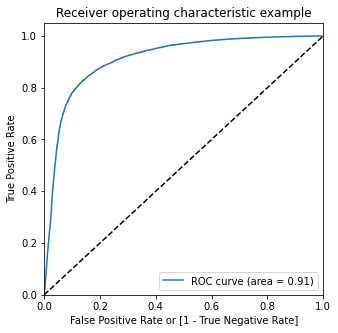

In [138]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding the Optimal cutoff point for the churn value

In [139]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005706,29172,0,1,0,0,0,0,0,0,0,0,0
1,0,0.171001,9013,0,1,1,0,0,0,0,0,0,0,0
2,0,0.036019,8741,0,1,0,0,0,0,0,0,0,0,0
3,1,0.937992,30680,1,1,1,1,1,1,1,1,1,1,1
4,1,0.690350,43716,1,1,1,1,1,1,1,1,0,0,0


In [140]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500885  1.000000  0.000000
0.1   0.1  0.711953  0.977540  0.445424
0.2   0.2  0.775625  0.951856  0.598769
0.3   0.3  0.810937  0.924873  0.696598
0.4   0.4  0.831693  0.891494  0.771679
0.5   0.5  0.842448  0.852969  0.831890
0.6   0.6  0.843359  0.809764  0.877074
0.7   0.7  0.833594  0.755277  0.912188
0.8   0.8  0.798385  0.654310  0.942972
0.9   0.9  0.649505  0.325673  0.974486


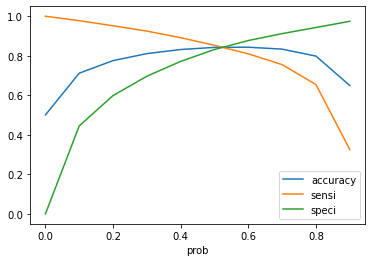

In [141]:
# Plottign the tradeoff graph between all the metrics
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Seems like our threshold of 0.5 is fine for sensitivity and specificity

### Precision & Recall calculations

In [142]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[15944,  3222],
       [ 2828, 16406]], dtype=int64)

#### Formula for Precision: TP/TP+FP

In [143]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
print("Precision: {}".format(precision))

Precision: 0.8358467495414713


#### Formula for recall: TP/TP+FN

In [144]:
recall_log = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print("Recall: {}".format(recall_log))

Recall: 0.8529687012581886


#### F score calculation

- (2 × precision × recall)/(precision + recall)

In [145]:
f_score = (2*precision*recall_log)/(precision+recall_log)
print("F Score: {}".format(f_score))

F Score: 0.8443209304719262


#### Precision & Recall tradeoff graph plottin

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

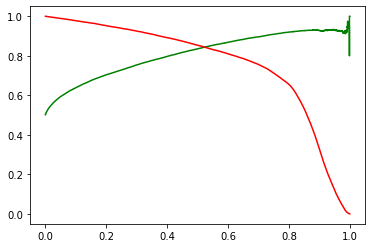

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- Looks like all our metrics i.e sensitivity, specificity, precision & recall performs good at 0.5 threshold

### Results of Logistic Regression Model ( high performance Model 3 )

#### Accuracy and Recall printed below

In [149]:
print("Accuracy: {}".format(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))

Accuracy: 0.8424479166666666


In [150]:
print("Recall: {}".format(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

Recall: 0.8358467495414713


## Overall scores of all 3 high performance models

In [151]:
performance = pd.DataFrame(columns = ['Model', 'Accuracy', 'Recall'])
performance.loc[0] = ['Logistic Regression', accuracy_log, recall_log]
performance.loc[1] = ['Decision Tree', accuracy_dt, recall_dt]
performance.loc[2] = ['Random Forest', accuracy_rf, recall_rf]
performance.index+=1
performance.Recall=performance.Recall.round(4)*100
performance.Accuracy=performance.Accuracy.round(4)*100

## Logistic Regression Model ( Interpretable Model )

In [152]:
# creating a copy of high_perf_df dataframe prepare the logistic regression model
df_logistic = X_train_res.copy()

In [153]:
df_logistic.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7
0,0.0,0.0,0.0,1.636538,2.510202,2.917916,-0.632765,-0.638199,-0.582044,0.183719,0.483571,-0.069579,0.119836,0.820679,0.779999,0.055230,-0.047434,0.514612,-0.227406,-0.395114,-0.286462,0.790690,1.591565,0.045609,4.052607,4.018113,3.953139,-0.369572,-0.367066,-0.372651,0.594926,1.012623,0.054113,-0.556035,-0.496123,-0.485373,-0.445253,-0.513778,-0.390214,1.180417,4.049451,3.777932,0.0,0.0,0.0,-0.635238,-0.616203,-0.524932,-0.138064,-0.117964,1.157448,-0.040652,-0.545198,0.071548,-0.426134,-0.052411,-0.053892,-0.310926,-0.114909,-0.443956,-0.016040,-0.342466,-0.375726,0.465410,0.489991,-0.142311,3.941360,3.456858,1.220376,0.901843,0.565176,-0.138790,0.842253,-0.042611,0.690776,1.392479,2.061516,2.514639,6.146451,4.709044,3.162115,0.0,0.0,0.0,1.983680,1.779694,2.276002,1.288744,1.000177,0.589241,1.170169,-0.211988,-0.281408,-0.204331,0.235887,0.929155,4.530180,3.662803,4.386994,-0.891236,-0.840879,-0.362534,2.462928,0.306563,2.922249,3.140534,3.170830,3.094419,-1.066931,-1.041198,3.180123,-0.590113,-0.584966,-0.586743,-0.6139,-0.621789,-0.600220,-0.488382,-0.488388,-0.500218,-0.416789,-0.412447,-0.398331,-0.598368,-0.610213,-0.599025,-0.392531,-0.387670,-0.370156,-0.423909,-0.440588,-0.432326,-1,-1,-1,-0.353408,-0.360820,-0.338008,-0.390873,-0.398025,-0.421096,-0.36456,-0.365912,-0.358684,-0.25275,-0.24774,-0.231834,-1,-1,-1,-0.474119,-0.182020,-0.345100,-0.325309,2.459186,0.303607,1.619414
1,0.0,0.0,0.0,-0.621115,-0.254252,-1.102039,0.447605,0.226780,-0.636276,-0.848816,-0.882442,-0.628892,-0.334017,-0.294580,-0.297937,-0.354586,-0.327419,-0.317323,1.819886,1.134152,-0.529421,-0.476394,-0.549151,-0.608889,-0.489121,-0.495552,-0.489869,-0.369572

In [154]:
df_logistic.shape

(54858, 157)

In [155]:
df_logistic['churn'] = y_res
df_logistic.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7,churn
0,0.0,0.0,0.0,1.636538,2.510202,2.917916,-0.632765,-0.638199,-0.582044,0.183719,0.483571,-0.069579,0.119836,0.820679,0.779999,0.055230,-0.047434,0.514612,-0.227406,-0.395114,-0.286462,0.790690,1.591565,0.045609,4.052607,4.018113,3.953139,-0.369572,-0.367066,-0.372651,0.594926,1.012623,0.054113,-0.556035,-0.496123,-0.485373,-0.445253,-0.513778,-0.390214,1.180417,4.049451,3.777932,0.0,0.0,0.0,-0.635238,-0.616203,-0.524932,-0.138064,-0.117964,1.157448,-0.040652,-0.545198,0.071548,-0.426134,-0.052411,-0.053892,-0.310926,-0.114909,-0.443956,-0.016040,-0.342466,-0.375726,0.465410,0.489991,-0.142311,3.941360,3.456858,1.220376,0.901843,0.565176,-0.138790,0.842253,-0.042611,0.690776,1.392479,2.061516,2.514639,6.146451,4.709044,3.162115,0.0,0.0,0.0,1.983680,1.779694,2.276002,1.288744,1.000177,0.589241,1.170169,-0.211988,-0.281408,-0.204331,0.235887,0.929155,4.530180,3.662803,4.386994,-0.891236,-0.840879,-0.362534,2.462928,0.306563,2.922249,3.140534,3.170830,3.094419,-1.066931,-1.041198,3.180123,-0.590113,-0.584966,-0.586743,-0.6139,-0.621789,-0.600220,-0.488382,-0.488388,-0.500218,-0.416789,-0.412447,-0.398331,-0.598368,-0.610213,-0.599025,-0.392531,-0.387670,-0.370156,-0.423909,-0.440588,-0.432326,-1,-1,-1,-0.353408,-0.360820,-0.338008,-0.390873,-0.398025,-0.421096,-0.36456,-0.365912,-0.358684,-0.25275,-0.24774,-0.231834,-1,-1,-1,-0.474119,-0.182020,-0.345100,-0.325309,2.459186,0.303607,1.619414,1
1,0.0,0.0,0.0,-0.621115,-0.254252,-1.102039,0.447605,0.226780,-0.636276,-0.848816,-0.882442,-0.628892,-0.334017,-0.294580,-0.297937,-0.354586,-0.327419,-0.317323,1.819886,1.134152,-0.529421,-0.476394,-0.549151,-0.608889,-0.489121,-0.495552,-0.489869,-

### Train Test Split

In [156]:
X_logistic = df_logistic.drop('churn', axis = 1)
y_logistic = df_logistic['churn']

In [157]:
y_logistic

0        1
1        0
2        0
3        0
4        0
        ..
54853    1
54854    1
54855    1
54856    1
54857    1
Name: churn, Length: 54858, dtype: int32

In [158]:
y_logistic.shape, X_logistic.shape

((54858,), (54858, 157))

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, train_size=0.7,test_size=0.3, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38400, 157)
(38400,)
(16458, 157)
(16458,)


In [160]:
# Checking he type of variable of y_train
print(type(y_train))
print(type(X_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [162]:
import warnings
warnings.filterwarnings("ignore")

In [163]:
y_train = y_train.to_frame()
y_train.shape

(38400, 1)

In [164]:
logistic2 = LogisticRegression()
rfe_logistic2 = RFE(logistic2, 50)
rfe_logistic2 = rfe_logistic2.fit(X_train, y_train)

In [165]:
col = X_train.columns[rfe_logistic2.support_]
print(col)

Index(['arpu_7', 'arpu_8', 'onnet_mou_6', 'offnet_mou_6', 'offnet_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_8', 'count_rech_2g_7', 'av_rech_amt_data_7',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'night_pck_user_8', 'sachet_2g_7',
       'sachet_2g_8', 'fb_user_8', 'aon'],
      dtype='object')


In [166]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [167]:
logistic3 = LogisticRegression()
rfe_logistic3 = RFE(logistic3, 20)
rfe_logistic3 = rfe_logistic3.fit(X_train, y_train)

In [168]:
col = X_train.columns[rfe_logistic3.support_]
print(col)

Index(['arpu_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_7', 'sachet_2g_7'],
      dtype='object')


In [169]:
X_train_sm = sm.add_constant(X_train[col])
logistic4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model4 = logistic4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38379
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14638.
Date:                Tue, 01 Sep 2020   Deviance:                       29276.
Time:                        14:31:16   Pearson chi2:                 9.44e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8166      0.026    -70.755      0.000      -1.867      -1.766
arpu_7                 0.7003      0.019     36.263      0.000       0.662       0.738
loc_og_t2t_mou_8      -0.9095      0.089    -10.220      0.000      -1.084      -0.735
loc_og_t2m_mou_8      -1.5329      0.115    -13.316      0.000      -1.758      -1.307
loc_og_mou_8           2.4237      0.190     12.758      0.000       2.051       2.796
std_og_t2t_mou_8      -0.8413      0.063    -13.274      0.000      -0.966      -0.717
std_og_t2m_mou_8      -0.7696      0.063    -12.239      0.000      -0.893      -0.646
std_og_mou_8           3.0095      0.211     14.234      0.000       2.595       3.424
total_og_mou_8        -2.5984      0.180    -14.458      0.000      -2.951      -2.246
loc_ic_t2t_mou_8      -0.7961      0.068    -11.700      0.000      -0.929      -0.663
loc_ic_t2m_mou_8      -1.4767      0.103    -14.391      0.000      -1.678      -1.276
loc_ic_t2f_mou_8      -0.6375      0.037    -17.416      0.000      -0.709      -0.566
loc_ic_mou_8           3.1337      0.169     18.536      0.000       2.802       3.465
std_ic_mou_8           0.4466      0.042     10.719      0.000       0.365       0.528
total_ic_mou_8        -2.0885      0.117    -17.800      0.000      -2.318      -1.859
spl_ic_mou_8          -0.5229      0.027    -19.180      0.000      -0.576      -0.469
total_rech_num_8      -0.5639      0.021    -26.462      0.000      -0.606      -0.522
last_day_rch_amt_8    -0.6950      0.021    -33.450      0.000      -0.736      -0.654
max_rech_data_8       -0.7219      0.023    -31.636      0.000      -0.767      -0.677
count_rech_2g_7       -0.6936      0.069    -10.026      0.000      -0.829      -0.558
sachet_2g_7            0.5598      0.068      8.208      0.000       0.426       0.694
======================================================================================
"""

In [170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_8,64.32
3,loc_og_mou_8,58.01
11,loc_ic_mou_8,54.50
7,total_og_mou_8,42.19
9,loc_ic_t2m_mou_8,23.77
2,loc_og_t2m_mou_8,22.80
13,total_ic_mou_8,19.20
18,count_rech_2g_7,13.97
19,sachet_2g_7,13.61
4,std_og_t2t_mou_8,13.22


In [171]:
logistic5 = LogisticRegression()
rfe_logistic5 = RFE(logistic5, 10)
rfe_logistic5 = rfe_logistic5.fit(X_train, y_train)

In [172]:
col = X_train.columns[rfe_logistic3.support_]
print(col)

Index(['arpu_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_7', 'sachet_2g_7'],
      dtype='object')


In [173]:
X_train_sm = sm.add_constant(X_train[col])
logistic6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model6 = logistic6.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38379
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14638.
Date:                Tue, 01 Sep 2020   Deviance:                       29276.
Time:                        14:34:13   Pearson chi2:                 9.44e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8166      0.026    -70.755      0.000      -1.867      -1.766
arpu_7                 0.7003      0.019     36.263      0.000       0.662       0.738
loc_og_t2t_mou_8      -0.9095      0.089    -10.220      0.000      -1.084      -0.735
loc_og_t2m_mou_8      -1.5329      0.115    -13.316      0.000      -1.758      -1.307
loc_og_mou_8           2.4237      0.190     12.758      0.000       2.051       2.796
std_og_t2t_mou_8      -0.8413      0.063    -13.274      0.000      -0.966      -0.717
std_og_t2m_mou_8      -0.7696      0.063    -12.239      0.000      -0.893      -0.646
std_og_mou_8           3.0095      0.211     14.234      0.000       2.595       3.424
total_og_mou_8        -2.5984      0.180    -14.458      0.000      -2.951      -2.246
loc_ic_t2t_mou_8      -0.7961      0.068    -11.700      0.000      -0.929      -0.663
loc_ic_t2m_mou_8      -1.4767      0.103    -14.391      0.000      -1.678      -1.276
loc_ic_t2f_mou_8      -0.6375      0.037    -17.416      0.000      -0.709      -0.566
loc_ic_mou_8           3.1337      0.169     18.536      0.000       2.802       3.465
std_ic_mou_8           0.4466      0.042     10.719      0.000       0.365       0.528
total_ic_mou_8        -2.0885      0.117    -17.800      0.000      -2.318      -1.859
spl_ic_mou_8          -0.5229      0.027    -19.180      0.000      -0.576      -0.469
total_rech_num_8      -0.5639      0.021    -26.462      0.000      -0.606      -0.522
last_day_rch_amt_8    -0.6950      0.021    -33.450      0.000      -0.736      -0.654
max_rech_data_8       -0.7219      0.023    -31.636      0.000      -0.767      -0.677
count_rech_2g_7       -0.6936      0.069    -10.026      0.000      -0.829      -0.558
sachet_2g_7            0.5598      0.068      8.208      0.000       0.426       0.694
======================================================================================
"""

In [174]:
# Getting the predicted probabilities
y_train_pred = model6.predict(X_train_sm)
y_train_pred[:7]

29172    0.094758
9013     0.063163
8741     0.080948
30680    0.947493
43716    0.749518
17901    0.698324
52619    0.545296
dtype: float64

In [175]:
type(y_train)

pandas.core.frame.DataFrame

In [176]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09475804, 0.06316347, 0.08094844, 0.94749283, 0.74951819,
       0.69832388, 0.54529647, 0.22667736, 0.01674557, 0.90585135])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [177]:
Churn_Prob = y_train_pred
Churn = y_train['churn']
y_pred_final = pd.DataFrame({'Churn_Prob': Churn_Prob, 'Churn': Churn})
y_pred_final.head()

,Churn_Prob,Churn
29172,0.094758,0
9013,0.063163,0
8741,0.080948,0
30680,0.947493,1
43716,0.749518,1


In [178]:
# y_train_pred_final = pd.DataFrame({'Churn_Prob':y_train_pred, 'Churn':y_train})
# y_train_pred_final['ID'] = y_train
# y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [179]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005706,29172,0,1,0,0,0,0,0,0,0,0,0
1,0,0.171001,9013,0,1,1,0,0,0,0,0,0,0,0
2,0,0.036019,8741,0,1,0,0,0,0,0,0,0,0,0
3,1,0.937992,30680,1,1,1,1,1,1,1,1,1,1,1
4,1,0.690350,43716,1,1,1,1,1,1,1,1,0,0,0


In [180]:
from sklearn import metrics

In [181]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15944  3222]
 [ 2828 16406]]


In [182]:
# overall accuracy.
accuracy_log = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print("Accuracy: {}".format(accuracy_log))

Accuracy: 0.8424479166666666


In [183]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [184]:
# sensitivity
TP / float(TP+FN)

0.8529687012581886

In [185]:
# specificity
TN / float(TN+FP)

0.8318898048627779

### ROC Curve Plotting

In [186]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [187]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

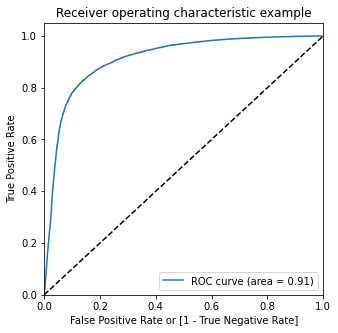

In [188]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding the Optimal cutoff point for the churn value

In [189]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005706,29172,0,1,0,0,0,0,0,0,0,0,0
1,0,0.171001,9013,0,1,1,0,0,0,0,0,0,0,0
2,0,0.036019,8741,0,1,0,0,0,0,0,0,0,0,0
3,1,0.937992,30680,1,1,1,1,1,1,1,1,1,1,1
4,1,0.690350,43716,1,1,1,1,1,1,1,1,0,0,0


In [190]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500885  1.000000  0.000000
0.1   0.1  0.711953  0.977540  0.445424
0.2   0.2  0.775625  0.951856  0.598769
0.3   0.3  0.810937  0.924873  0.696598
0.4   0.4  0.831693  0.891494  0.771679
0.5   0.5  0.842448  0.852969  0.831890
0.6   0.6  0.843359  0.809764  0.877074
0.7   0.7  0.833594  0.755277  0.912188
0.8   0.8  0.798385  0.654310  0.942972
0.9   0.9  0.649505  0.325673  0.974486


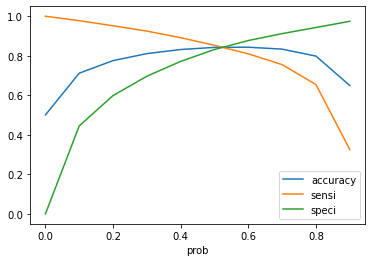

In [191]:
# Plottign the tradeoff graph between all the metrics
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Seems like our threshold of 0.5 is fine for sensitivity and specificity

### Precision & Recall calculations

In [192]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[15944,  3222],
       [ 2828, 16406]], dtype=int64)

#### Formula for Precision: TP/TP+FP

In [193]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
print("Precision: {}".format(precision))

Precision: 0.8358467495414713


#### Formula for recall: TP/TP+FN

In [194]:
recall_log = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print("Recall: {}".format(recall_log))

Recall: 0.8529687012581886


#### F score calculation

- (2 × precision × recall)/(precision + recall)

In [195]:
f_score = (2*precision*recall_log)/(precision+recall_log)
print("F Score: {}".format(f_score))

F Score: 0.8443209304719262


#### Precision & Recall tradeoff graph plottin

In [196]:
from sklearn.metrics import precision_recall_curve

In [197]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

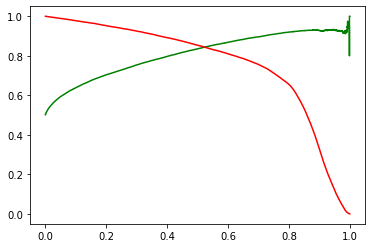

In [198]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- Looks like all our metrics i.e sensitivity, specificity, precision & recall performs good at 0.5 threshold

#### Accuracy and Recall printed below

In [199]:
accuracy = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted) *100
print("Accuracy: {}".format(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))

Accuracy: 0.8424479166666666


In [200]:
recall = confusion[1,1]/(confusion[0,1]+confusion[1,1])*100
print("Recall: {}".format(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

Recall: 0.8358467495414713


In [201]:
performance.loc[4] = ['Logistic Regression Intrepretable', accuracy, recall]
performance

,Model,Accuracy,Recall
1,Logistic Regression,84.240000,85.300000
2,Decision Tree,83.000000,87.000000
3,Random Forest,81.000000,80.000000
4,Logistic Regression Intrepretable,84.244792,83.584675


## Top 10 features of interpretable model are below

- spl_ic_mou_8	
- arpu_7	
- max_rech_data_8	
- last_day_rch_amt_8	
- total_rech_num_8	
- loc_ic_t2f_mou_8	
- std_ic_mou_8	
- loc_ic_t2t_mou_8	
- loc_og_t2t_mou_8	
- std_og_t2m_mou_8	